In [12]:
import json

Read config,json file

In [50]:

with open(r'C:\Users\atharva.yanna\Desktop\Python\Assignment 1\config.json', 'r') as f:
    data = json.load(f)

    print(data['Page_number'])

2


In [8]:
data['Companies'].append('Meta')
print(data['Companies'])

['Tata', 'Reliance', 'Apple', 'Meta']


Using Selenium to search 

In [1]:
from bs4 import BeautifulSoup
from selenium  import webdriver
import time

# to find elements by id
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

import re
from datetime import datetime, timedelta

In [2]:
from selenium.webdriver.firefox.service import Service as FirefoxService
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [41]:
driver = webdriver.Firefox()
time.sleep(1)
search = 'Tata '+'Merger'
driver.get('https://www.google.com/')
time.sleep(1)
input = driver.find_element(By.ID, 'APjFqb')
input.send_keys(search)
input.send_keys(Keys.ENTER)
time.sleep(1)
# source = driver.page_source
source = driver.execute_script('return document.documentElement.outerHTML')
time.sleep(2)

soup = BeautifulSoup(source, 'html.parser')
print("Done")


Done


<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en-IN"><head><meta charset="utf-8"/><meta content="origin" name="referrer"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>Tata Merger - Google Search</title><script nonce="">window._hst=Date.now();performance&&performance.mark&&performance.mark("SearchHeadStart");</script><script nonce="">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){a!=="unload"&&b(a,c,d)};}).call(this);(function(){var _g={kEI:'wbfWZtTHO7y2seMPh7u7kAM',kEXPI:'31',kBL:'k3Am',kOPI:89978449};(function(){var a;((a=window.google)==null?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn='web';google.kHL='en-IN';})();(function(){
var h=this||self;function l(){return window.google!==void 0&&window.google.kOPI!==void 0&&window.google.kOPI!==0?window.google.kOPI:null};var m,n=[];function p(a){for(var b;a&&(!a.getAttribute||!(b=a.ge
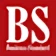
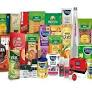
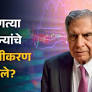
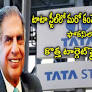
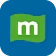
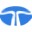
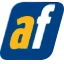
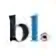
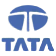
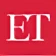
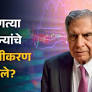
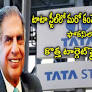
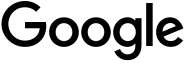

In [3]:
print(soup)

In [53]:
a = soup.find_all('div', {'class':'yuRUbf'})
print(len(a))


href = a[0].find('a')
link = href.get('href')
title = href.find('h3').text
media_name = href.find('div',{'class': 'CA5RN'}).find('span').text
print(media_name)
print(title)
print(link)

9
moneycontrol.com
Tata Consumer Products completes merger of subsidiaries to simplify, streamline business
https://www.moneycontrol.com/news/business/tata-consumer-products-completes-merger-of-subsidiaries-to-simplify-streamline-business-12811721.html


In [67]:
#for getting the first timestamp
b = soup.find_all('div', {'class':'LGOjhe'})
first_ts = b[0].find('span',{'class':'kX21rb ZYHQ7e'}).text
print(first_ts)

2 days ago


In [61]:
c = soup.find_all('div',{'class':'kb0PBd cvP2Ce A9Y9g'})
print(len(c))

time_s = c[0].find('span', {'class':'LEwnzc Sqrs4e'})
time_s = time_s.find('span').text
print(time_s)

8
7 Feb 2024


In [7]:
import re
from datetime import datetime, timedelta

def date(d):
    """This Function takes string input and checks the 'day ago' pattern if true then returns the date accordingly"""
    if re.search(r'[0-9]+ days ago',d):
        days = int(re.findall(r'[0-9]+', d)[0])
        print(days)
        new_date =datetime.now() - timedelta(days = days)
        return new_date.strftime('%d %b %Y')
    else:
        return d

print(date('2 days ago'))

2
02 Sep 2024


Scraping for google search

In [33]:

data_dict = {
    "Companies":[],
    "Keywords":[],
    "Search": [],
    "Search Engine":[],
    "Title":[],
    "Link": [],
    "Time Stamp":[],
    "Media name": []

}

In [21]:
pg = 0
driver = webdriver.Firefox()
driver.get('https://www.google.com/')
time.sleep(1)
input = driver.find_element(By.ID, 'APjFqb')
input.send_keys("Tata Merger")
input.send_keys(Keys.ENTER)
time.sleep(1)
news = driver.find_element(By.PARTIAL_LINK_TEXT, "News")
news.click()
time.sleep(1)

# source = driver.page_source
source = driver.execute_script('return document.documentElement.outerHTML')
time.sleep(2)
soup = BeautifulSoup(source, 'html.parser')


next_page = driver.find_element(By.ID, 'pnnext')
next_page.click()
# print(soup)

In [8]:
a = soup.find_all('div', {'class':'MjjYud'})
data_div = a[0].find_all('div', {'class': 'SoaBEf'})
print(len(data_div))

link = data_div[0].find('a',{'class':'WlydOe'}).get('href')
print(link)
title = data_div[0].find('div',{'class':'n0jPhd ynAwRc MBeuO nDgy9d'}).text
print(title)
ts = data_div[0].find('div',{'class':'OSrXXb rbYSKb LfVVr'}).text
ts = date(ts)
print(ts)
media_name = data_div[0].find('div',{'class':'MgUUmf NUnG9d'}).find('span').text
print(media_name)

link = data_div[4].find('a',{'class':'WlydOe'}).get('href')
print(link)
title = data_div[4].find('div',{'class':'n0jPhd ynAwRc MBeuO nDgy9d'}).text
print(title)
ts = data_div[4].find('div',{'class':'OSrXXb rbYSKb LfVVr'}).text
ts = date(ts)
print(ts)
media_name = data_div[4].find('div',{'class':'MgUUmf NUnG9d'}).find('span').text
print(media_name)



5
https://www.esakal.com/sakal-money/share-market/tata-consumer-products-completes-merger-of-three-subsidiaries-in-india-ras98
Tata Group: टाटा समूहाने केले 3 कंपन्यांचे विलीनीकरण; गुंतवणूकदारांवर होणार 
मोठा परिणाम
1 day ago
Esakal
https://www.equitypandit.com/tata-consumer-products-merges-three-wholly-owned-subsidiaries-in-india/
Tata Consumer Products Merges Three Wholly-Owned Subsidiaries in India
16 hours ago
Equitypandit


In [9]:
card_news = soup.find_all('div',{'class':'m7jPZ'})
len(card_news)

for e in card_news:
    link = e.find('a',{'class':'WlydOe'}).get('href')
    title = e.find('div',{'class':'n0jPhd ynAwRc tNxQIb nDgy9d'}).text
    media_name = e.find('div',{'class':'MgUUmf NUnG9d'}).find('span').text

    print(link)
    print(title)
    print(media_name)

https://www.business-standard.com/companies/news/tata-consumer-products-completes-merger-of-three-subsidiaries-in-india-124090100552_1.html
Tata Consumer Products completes merger of three subsidiaries in India
Business Standard
https://www.financialexpress.com/business/industry/tata-consumer-products-completes-merger-of-three-wholly-owned-subsidiaries/3598324/
Tata Consumer Products completes merger of three wholly-owned subsidiaries
The Financial Express
https://inc42.com/buzz/tata-consumer-products-merges-subsidiaries-to-simplify-streamline-operations/
Tata Consumer Products Merges Three Subsidiaries
Inc42
https://www.moneycontrol.com/news/business/tata-consumer-products-completes-merger-of-subsidiaries-to-simplify-streamline-business-12811721.html
Tata Consumer Products completes merger of subsidiaries to simplify, 
streamline business
Moneycontrol
https://www.afaqs.com/news/brands/tata-consumer-products-completes-merger-of-3-wholly-owned-subsidiaries-in-india
Tata Consumer Product

In [31]:
#Get date from meta data of the link
def extract_date_from_meta(link):
    """This function takes the URL link as input and searches for 'article:published_time' or 'itemprop' in meta tags.
    If present, it fetches the datetime and returns it; otherwise, it returns None."""
    
    # Set up the WebDriver (You may need to adjust path to geckodriver or setup)
    # service = FirefoxService(executable_path='/path/to/geckodriver')  # Adjust path to your geckodriver
    # driver = webdriver.Firefox(service=service)
    date_driver = webdriver.Firefox()
    
    try:
        # Load the page
        date_driver.get(link)
        
        # Wait for the page to fully load (adjust the waiting time as necessary)
        # WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.TAG_NAME, 'html')))
        
        # Get the page source and parse it with BeautifulSoup
        source = date_driver.page_source
        date_soup = BeautifulSoup(source, 'html.parser')  # Corrected the parser argument
        
        # Extract date from meta tags
        meta_tag = date_soup.find('meta', {'property': 'article:published_time'})
        if meta_tag:
            return meta_tag.get('content')
        
        meta_tag = date_soup.find('meta', {'itemprop': 'article:published_time'})
        if meta_tag:
            return meta_tag.get('content')
        
        return None
    finally:
        # Close the WebDriver instance
        date_driver.quit()

In [32]:
print(data_dict)

{'Companies': ['Tata', 'Tata', 'Tata'], 'Keywords': ['Merger', 'Merger', 'Merger'], 'Search': ['Tata Merger', 'Tata Merger', 'Tata Merger'], 'Search Engine': ['Google', 'Google', 'Google'], 'Title': ['Tata Consumer Products completes merger of three subsidiaries in India', 'Tata Consumer Products completes merger of three subsidiaries in India', 'Tata Consumer Products completes merger of three wholly-owned subsidiaries'], 'Link': ['https://www.business-standard.com/companies/news/tata-consumer-products-completes-merger-of-three-subsidiaries-in-india-124090100552_1.html', 'https://www.business-standard.com/companies/news/tata-consumer-products-completes-merger-of-three-subsidiaries-in-india-124090100552_1.html', 'https://www.financialexpress.com/business/industry/tata-consumer-products-completes-merger-of-three-wholly-owned-subsidiaries/3598324/'], 'Time Stamp': ['2024-09-01T20:59:09+05:30'], 'Media name': ['Business Standard', 'Business Standard', 'The Financial Express']}


For Google search engine

In [34]:


for company in data['Companies']:
    for keyword in data['keywords']:
        search = company+" "+keyword
        flag = True
        pg = 0
        while pg != data['page_number']:
            if flag:
                driver = webdriver.Firefox()
                driver.get('https://www.google.com/')
                time.sleep(1)
                input = driver.find_element(By.ID, 'APjFqb')
                input.send_keys(search)
                input.send_keys(Keys.ENTER)
                time.sleep(1)
                news = driver.find_element(By.PARTIAL_LINK_TEXT, "News")
                news.click()
                time.sleep(1)

                # source = driver.page_source
                source = driver.execute_script('return document.documentElement.outerHTML')
                time.sleep(2)
                soup = BeautifulSoup(source, 'html.parser')

                card_news = soup.find_all('div',{'class':'m7jPZ'})
                len(card_news)

                for e in card_news:
                    link = e.find('a',{'class':'WlydOe'}).get('href')
                    title = e.find('div',{'class':'n0jPhd ynAwRc tNxQIb nDgy9d'}).text
                    media_name = e.find('div',{'class':'MgUUmf NUnG9d'}).find('span').text
                    data_dict['Companies'].append(company)
                    data_dict['Keywords'].append(keyword)
                    data_dict['Search'].append(search)
                    data_dict['Search Engine'].append('Google')
                    data_dict['Link'].append(link)
                    data_dict['Media name'].append(media_name)
                    data_dict['Title'].append(title)

                    date_time = extract_date_from_meta(link)
                    data_dict['Time Stamp'].append(date_time)
            
            if not flag:
                source = driver.execute_script('return document.documentElement.outerHTML')
                time.sleep(2)
                soup = BeautifulSoup(source, 'html.parser')
            
            flag = False
            news_cards = soup.find_all('div', {'class':'MjjYud'})

            #Iterrate and extract data for every card
            for news in news_cards:
                link =news.find('a',{'class':'WlydOe'}).get('href') 
                title =news.find('div',{'class':'n0jPhd ynAwRc MBeuO nDgy9d'}).text
                media_name =news.find('div',{'class':'MgUUmf NUnG9d'}).find('span').text
                data_dict['Companies'].append(company)
                data_dict['Keywords'].append(keyword)
                data_dict['Search'].append(search)
                data_dict['Search Engine'].append('Google')
                data_dict['Link'].append(link)
                data_dict['Media name'].append(media_name)
                data_dict['Title'].append(title)

                date_time = extract_date_from_meta(link)
                data_dict['Time Stamp'].append(date_time)

            next_page = driver.find_element(By.ID, 'pnnext')
            next_page.click()

            pg = pg +1
            
        driver.quit()
    
    
            


NoSuchWindowException: Message: Browsing context has been discarded
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:193:5
NoSuchWindowError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:679:5
assert.that/<@chrome://remote/content/shared/webdriver/Assert.sys.mjs:515:13
assert.open@chrome://remote/content/shared/webdriver/Assert.sys.mjs:147:4
GeckoDriver.prototype.getPageSource@chrome://remote/content/marionette/driver.sys.mjs:960:15
despatch@chrome://remote/content/marionette/server.sys.mjs:318:40
execute@chrome://remote/content/marionette/server.sys.mjs:289:16
onPacket/<@chrome://remote/content/marionette/server.sys.mjs:262:20
onPacket@chrome://remote/content/marionette/server.sys.mjs:263:9
_onJSONObjectReady/<@chrome://remote/content/marionette/transport.sys.mjs:494:20


In [35]:
print(data_dict)

{'Companies': ['Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Reliance', 'Reliance', 'Reliance', 'Reliance', 'Reliance', 'Reliance', 'Reliance', 'Reliance', 'Reliance', 'Reliance', 'Reliance', 'Reliance', 'Reliance', 'Reliance', 'Reliance', 'Reliance', 'Reliance', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple'], 'Keywords': ['Merger', 'Merger', 'Merger', 'Merger', 'Merger', 'Merger', 'Merger', 'Merger', 'lawsuit', 'lawsuit', 'lawsuit', 'Bonus', 'Bonus', 'Bonus', 'bankruptcy', 'bankruptcy', 'bankruptcy', 'Merger', 'Merger', 'Merger', 'lawsuit', 'lawsuit', 'lawsuit', 'Bonus', 'Bonus', 'Bonus', 'Bonus', 'Bonus', 'Bonus', 'Bonus', 'Bonus', 'bankruptcy', 'bankruptcy', 'bankruptcy', 'Merger', 'Merger', 'Merger', 'lawsuit', 'lawsuit'], 'Search': ['Tata Merger', 'Tata Merger', 'Tata Merger', 'Tata Merger', 'Tata Merger', 'Tata Merger', 'Tata Merger', 'Tata Merger', 'Tata lawsuit', 'Tata lawsuit', 'Tata lawsu

For Yahoo Search engine

<html class="NoJs js" id="atomic" lang="en-IN"><head><meta content="on" http-equiv="x-dns-prefetch-control"/><meta content="text/html; charset=utf-8" http-equiv="content-type"/><link href="https://s.yimg.com/pv/static/img/y_icon_iphone_76.min.png" rel="apple-touch-icon" sizes="76x76"/><link href="https://s.yimg.com/pv/static/img/y_icon_iphone_114.min.png" rel="apple-touch-icon" sizes="114x114"/><link href="https://s.yimg.com/pv/static/img/y_icon_iphone_120.min.png" rel="apple-touch-icon" sizes="120x120"/><meta content="origin" name="referrer"/><meta content="width=device-width, initial-scale=1.0" name="viewport"/><meta content="guce.yahoo.com" name="oath:guce:consent-host"/><noscript><meta content="0;url=https://in.news.search.yahoo.com/search?p=Tata+Merger&amp;ei=UTF-8&amp;nojs=1" http-equiv="refresh"/></noscript><script type="text/javascript">!function(o){"use strict";var L=o.YAHOO=o.YAHOO||{};L.ULT||(L.ULT={}),L.ULT.SRC_SPACEID_KEY="_S",L.ULT.DEST_SPACEID_KEY="_s",L.ULT.SRC_VIEW_KEY
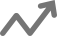
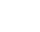
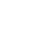

In [48]:
yahoo = 'https://in.search.yahoo.com/?fr2=inr'
driver = webdriver.Firefox()
driver.get(yahoo)
time.sleep(1)

input = driver.find_element(By.ID, 'yschsp')
input.send_keys('Tata Merger')
input.send_keys(Keys.ENTER)
time.sleep(1)
news_link = driver.find_element(By.PARTIAL_LINK_TEXT, 'News')
news_link.click()
time.sleep(1)

source = driver.execute_script('return document.documentElement.outerHTML')
time.sleep(1)
soup = BeautifulSoup(source, 'html.parser')
# print(soup)

next_page = driver.find_element(By.CLASS_NAME, 'next')
next_page.click()
# driver.quit()


In [47]:
news_cards = soup.find_all('div',{'class':'dd NewsArticle'})
# print(len(news_cards))

for news in news_cards:
    title = news.find('a').get('title')
    # print(title)
    link = news.find('a').get('href')
    # print(link)
    media_name = news.find('span',{'class':'s-source mr-5 cite-co'}).text
    # print(media_name)
    date = extract_date_from_meta(link)
    print(date)

None
None
2024-08-30T16:07:13+05:30
None
2024-09-03T09:58:30+05:30
None
None
2024-08-30T02:09:51.000Z
2024-09-02T08:25:31+05:30
None


In [52]:
for company in data['Companies']:
        for keyword in data['Keywords']:
            search = company+' '+keyword
            flag = True
            pg = 0
            driver = webdriver.Firefox()
            driver.get('https://in.search.yahoo.com/?fr2=inr')
            time.sleep(1)

            input = driver.find_element(By.ID, 'yschsp')
            input.send_keys(search)
            input.send_keys(Keys.ENTER)
            time.sleep(1)
            news_link = driver.find_element(By.XPATH, '/html/body/div[1]/div[2]/div/ol/li[1]/div/div/ul/li[4]/a')
            news_link.click()
            time.sleep(2)
            while pg != data['Page_number']:
                if flag:
                    source = driver.execute_script('return document.documentElement.outerHTML')
                    time.sleep(1)
                    soup = BeautifulSoup(source, 'html.parser')

                if not flag:
                    source = driver.execute_script('return document.documentElement.outerHTML')
                    time.sleep(1)
                    soup = BeautifulSoup(source, 'html.parser')
                flag = False

                news_cards = soup.find_all('div',{'class':'dd NewsArticle'})
                # print(len(news_cards))

                for news in news_cards:
                    title = news.find('a').get('title')
                    # print(title)
                    link = news.find('a').get('href')
                    # print(link)
                    media_name = news.find('span',{'class':'s-source mr-5 cite-co'}).text
                    # print(media_name)
                    date = extract_date_from_meta(link)
                    # print(date)

                    data_dict['Companies'].append(company)
                    data_dict['Keywords'].append(keyword)
                    data_dict['Search'].append(search)
                    data_dict['Search Engine'].append('Google')
                    data_dict['Link'].append(link)
                    data_dict['Media name'].append(media_name)
                    data_dict['Title'].append(title)
                    data_dict['Time Stamp'].append(date)

                next_page = driver.find_element(By.XPATH, '/html/body/div[1]/div[3]/div/div/div[1]/div/ol/li/div/div/a[2]')
                next_page.click()
                pg = pg + 1

TimeoutException: Message: Navigation timed out after 300000 ms
Stacktrace:
RemoteError@chrome://remote/content/shared/RemoteError.sys.mjs:8:8
WebDriverError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:193:5
TimeoutError@chrome://remote/content/shared/webdriver/Errors.sys.mjs:740:5
bail@chrome://remote/content/marionette/sync.sys.mjs:211:19


In [53]:
print(data_dict)

{'Companies': ['Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Reliance', 'Reliance', 'Reliance', 'Reliance', 'Reliance', 'Reliance', 'Reliance', 'Reliance', 'Reliance', 'Reliance', 'Reliance', 'Reliance', 'Reliance', 'Reliance', 'Reliance', 'Reliance', 'Reliance', 'Apple', 'Apple', 'Apple', 'Apple', 'Apple', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata', 'Tata'], 'Keywords': ['Merger', 'Merger', 'Merger', 'Merger', 'Merger', 'Merger', 'Merger', 'Merger', 'lawsuit', 'lawsuit', 'lawsuit', 'Bonus', 'Bonus', 'Bonus', 'bankruptcy', 'bankruptcy', 'bankruptcy', 'Merger', 'Merger', 'Merger', 'lawsuit', 'lawsuit', 'lawsuit', 'Bonus', 'Bonus', 'Bonus', 'Bonus', 'Bonus', 'Bonus', 'Bonus', 'Bonus', 'bankruptcy', 'bankruptcy', 'bankruptcy', 'Merger', 'Merger', 'Merger', 'lawsuit', 'lawsuit', 'Merger', 'Merger', 'Merger', 'Merger', 'Merger', 'Merg

In [5]:
import requests

def extract_date_from_meta(link):
    """Extracts the date from the meta tags of the given URL."""
    try:
        response = requests.get(link)
        
        # Get the page source and parse it with BeautifulSoup
        if response.status_code == 200:
            source = response.content
            date_soup = BeautifulSoup(source, 'html.parser')
            
            # Extract date from meta tags
            meta_tag = date_soup.find('meta', {'property': 'article:published_time'})
            if meta_tag:
                return meta_tag.get('content')
            
            meta_tag = date_soup.find('meta', {'itemprop': 'article:published_time'})
            if meta_tag:
                return meta_tag.get('content')
        
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None
    

In [7]:
date = extract_date_from_meta('https://www.news18.com/business/vistara-shuts-after-air-india-merger-a-complete-timeline-of-tata-groups-airline-business-9033112.html')

print(date)

2024-08-30T16:07:13+05:30


In [ ]:
import time
from bs4 import BeautifulSoup
# to find elements by id
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from utils import scrapper_utils as utils

def bing(queries, articles, driver,pages):
    #initialilizing browser
    url = 'https://www.bing.com/news/'
    driver.get(url)
    time.sleep(1)
 
    #handling mutliple quiries
    for query in queries:
       
               input_element = driver.find_element(By.ID, 'sb_form_q')
               input_element.clear()
 
               input_element.send_keys(query)
               input_element.send_keys(Keys.ENTER)  
           
           
               time.sleep(1)
           
                         
               for _ in range(pages):
                   try:
                          driver.execute_script("window.scrollBy(0, 10000);")
                          time.sleep(2)
 
                   except:
                        print("No more to scroll on bing ")
                   
               time.sleep(2)  
           
               html = driver.page_source
               
               soup = BeautifulSoup(html, 'html.parser')
           
               cards = soup.find_all('div' , class_ = "news-card newsitem cardcommon")
           
               for card in cards:
                             
                            try:
                               
                                #scrapeing relevant data
                                  time_parent = card.find('div' , class_ = "source biglogo set_top")
                                  time_tag = time_parent.find('span' , tabindex='0')
                                  time_text = time_tag.get('aria-label') if time_tag else 'No time'
 
                                 
                                 # links
                                  a_tag = card.find('a', class_ = 'title')
                                  href = a_tag.get('href')
 
                                  timestamp =  utils.extract_date_from_meta(href)
                                  if timestamp == 1:
                                      timestamp = time_text
 
                                 #media name
                                  media_name = a_tag.get('data-author')
                                  title = a_tag.get_text()
                                  title = title.strip().replace('\n', '') if title else 'No title'
                                 
                                #adding to dict
                                 
                                  article_dict = {
                                         'Search string': query,
                                         'Search engine': 'bing',
                                         'Link': href,
                                         'Title': title,
                                         'Time stamp': timestamp,
                                         'Media name': media_name
                                       }
                                 
                                 
                                 
                                  articles.append(article_dict)
           
                            except Exception as e:
                               pass
                           
 
 

In [22]:
driver = webdriver.Firefox()
driver.get('https://www.bing.com/news/')
time.sleep(1)

search = driver.find_element(By.ID, 'sb_form_q')
search.send_keys('Tata Merger')
time.sleep(1)
search.send_keys(Keys.ENTER)
time.sleep(3)

driver.execute_script("window.scrollBy(0, 10000);")
time.sleep(2)

source = source = driver.execute_script('return document.documentElement.outerHTML')
soup = BeautifulSoup(source, 'html.parser')
# print(soup)




13
None
None
None
None
None
None
None
None
None
None
None
None
None


In [26]:
news_cards = soup.find_all('div',{'class':'news-card newsitem cardcommon'})
print(len(news_cards))
for e in news_cards:
    title = e.get('data-title')
    print(title)
    link = e.get('url')
    print(link)
    media_name = e.get('data-author')
    print(media_name)

13
Tata LCC to complete on October 1; mega AI Express to have 100 aircraft by year end
https://timesofindia.indiatimes.com/business/india-business/ex-airasia-india-to-be-merged-into-ai-express/articleshow/113177707.cms
Indiatimes
Tata Sons invests ₹10,000 crore in arms in FY24
https://www.thehindubusinessline.com/companies/tata-sons-invests-10000-crore-in-arms-in-fy24/article68618832.ece
Business Line
Tata group's financial services business make hefty profits in FY24
https://www.business-standard.com/companies/news/tata-group-s-financial-services-business-make-hefty-profits-in-fy24-124090800510_1.html
Business Standard
Hot stocks: Brokerage view on Tata Tech, Zomato and Shriram Finance
https://www.msn.com/en-in/money/markets/hot-stocks-brokerage-view-on-tata-tech-zomato-and-shriram-finance/ar-AA1qe76l?ocid=BingNewsVerp
The Economic Times on MSN
Air India Express Targets AIX Connect Merger in October; Hamish Maxwell to Lead
https://www.goodreturns.in/news/air-india-express-merger-aix-c